## K-Means Clustering (Un-Supervised)
### A)K
#### 1) Number of clusters
### B)Clustering:
#### 1) Grouping data points and creating partation based on similarities OR Cluster is set of similar data points who are more similar to each other
### C) Steps to create K-Means cluster
#### 1) Select the number of cluster you want ot identifiy in your data for eg. k=3
#### 2) Randomly select three data points from dataset
#### 3) Measure the distance between the 1st point and three initial cluster
#### 4) Assign the first point to the nearest cluster
#### 5) Now for all data points repeat the process of measuring distance between points and clusters and assign the points to nearest cluster
#### 6) Now that all of our points belong to a specific cluster, Calculate the mean of each cluster
#### 7) Repeate the process of measuring and clustering based on mean values of clusters
### D) If Data is in different classes
#### 1) Use Eucledian distance to create your clusters
#### $$\sqrt{(x2 - x1)^{2} + (y2 -y1)^{2}}$$
### E) How to select best value for K
#### 1) Starting from k=1 keep to calculate its badness with total variation
#### 2) Now keep increasing value of K and compare its total variation with K=1
#### 3) Similary keep increasing value of K and conpare its total variation with previous number of k
#### 4) We can also plot(Elblow Plot) reduction variation plot to see the best values for k 

In [1]:
#https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

## Objective:
### To categorise the countries using socio-economic and health factors that determine the overall development of the country.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('country-data.csv')

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.shape

(167, 10)

In [9]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

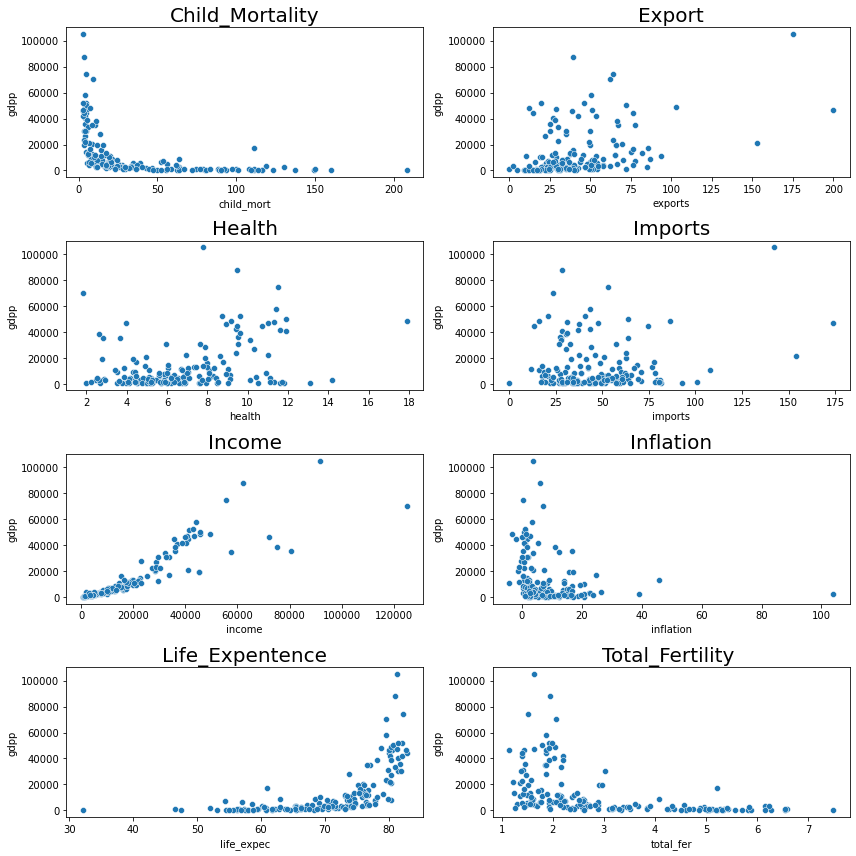

In [10]:
fig, axes = plt.subplots(4, 2,figsize=(12,12))
sns.scatterplot(x='child_mort',y='gdpp',data=df,ax=axes[0,0])
sns.scatterplot(x='exports',y='gdpp',data=df, ax=axes[0,1])
sns.scatterplot(x='health',y='gdpp',data=df, ax=axes[1,0])
sns.scatterplot(x='imports',y='gdpp',data=df, ax=axes[1,1])
sns.scatterplot(x='income',y='gdpp',data=df, ax=axes[2,0])
sns.scatterplot(x='inflation',y='gdpp',data=df, ax=axes[2,1])
sns.scatterplot(x='life_expec',y='gdpp',data=df, ax=axes[3,0])
sns.scatterplot(x='total_fer',y='gdpp',data=df, ax=axes[3,1])
axes[0,0].set_title("Child_Mortality", fontsize = 20,loc='center')
axes[0,1].set_title("Export", fontsize = 20,loc='center')
axes[1,0].set_title("Health", fontsize = 20,loc='center')
axes[1,1].set_title("Imports", fontsize = 20,loc='center')
axes[2,0].set_title("Income", fontsize = 20,loc='center')
axes[2,1].set_title("Inflation", fontsize = 20,loc='center')
axes[3,0].set_title("Life_Expentence", fontsize = 20,loc='center')
axes[3,1].set_title("Total_Fertility ", fontsize = 20,loc='center')
plt.tight_layout()

### 1) Child_Mortality
#### Death of children under 5 years of age per 1000 live births
#### Lest see child mortality of top and bottom Ten countries

In [11]:
bottom = df.sort_values(by=['child_mort']).head(10)
top = df.sort_values(by=['child_mort']).tail(10)

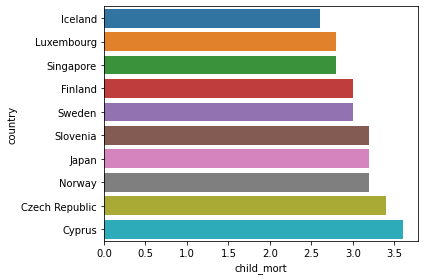

In [12]:
ax = sns.barplot(x="child_mort", y="country", data=bottom)
plt.tight_layout()

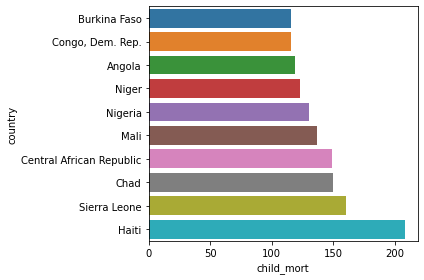

In [13]:
ax = sns.barplot(x="child_mort", y="country", data=top)
plt.tight_layout()

### 2) Now lets see exports and import status of countries

In [14]:
bottom_ex_im = df.sort_values(by=['exports','imports']).head(10)

In [15]:
top_ex_im = df.sort_values(by=['exports','imports']).tail(10)

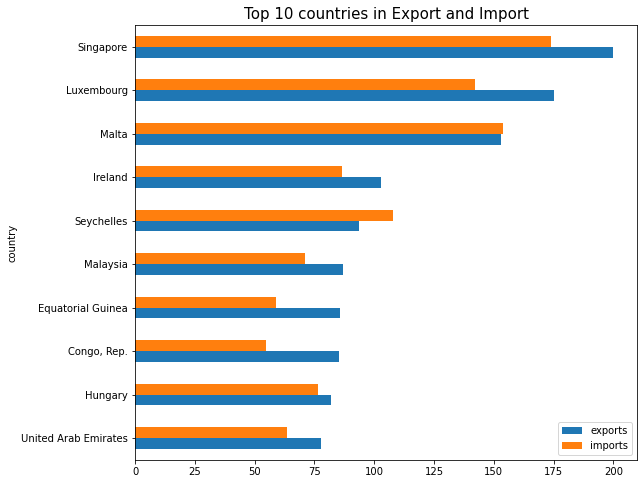

In [16]:
top_ex_im.plot(x='country',y=['exports','imports'],kind="barh",figsize=(9,8))
plt.title('Top 10 countries in Export and Import',fontsize=15);

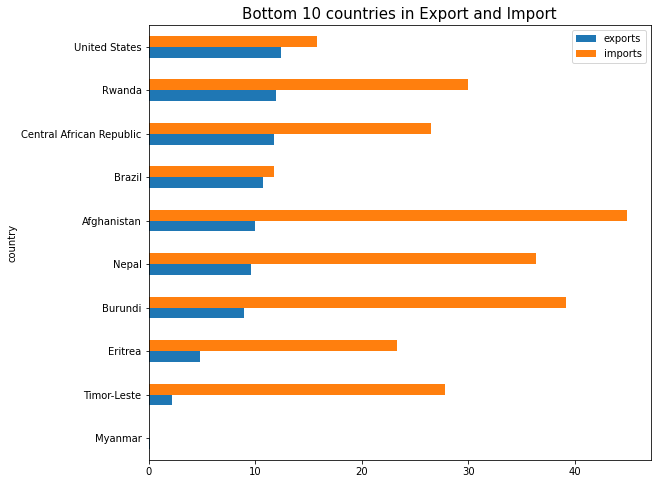

In [17]:
bottom_ex_im.plot(x='country',y=['exports','imports'],kind="barh",figsize=(9,8))
plt.title('Bottom 10 countries in Export and Import',fontsize=15);

### 3) Health
#### Total health spending per capita. Given as %age of GDP per capita

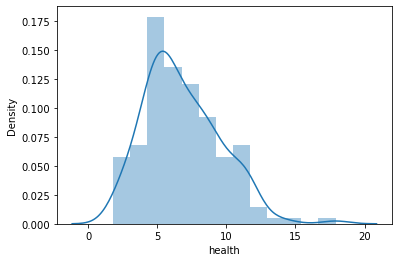

In [18]:
sns.distplot(df['health']);

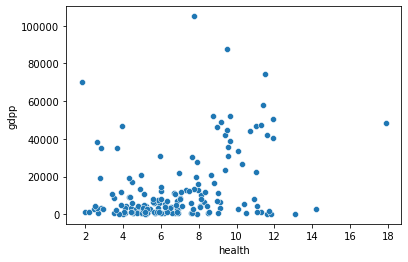

In [19]:
sns.scatterplot(x='health',y='gdpp',data=df);

### 4) Income
### Net income per person

In [20]:
bottom_income = df.sort_values(by=['income']).head(10)

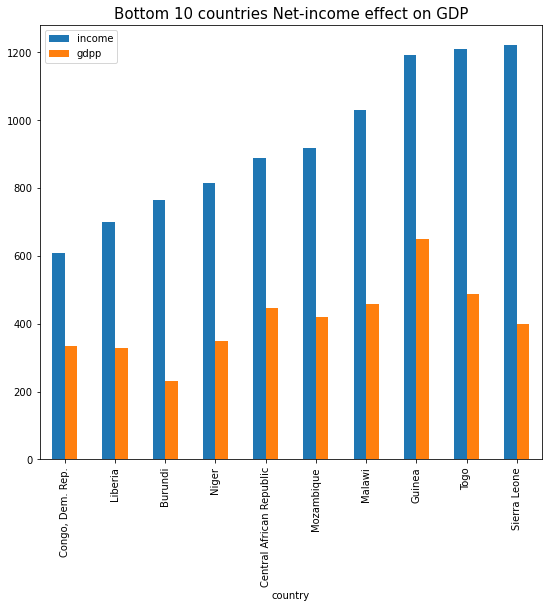

In [21]:
bottom_income.plot(x='country',y=['income','gdpp'],kind="bar",figsize=(9,8))
plt.title('Bottom 10 countries Net-income effect on GDP',fontsize=15);

In [22]:
top_income = df.sort_values(by=['income']).tail(10)

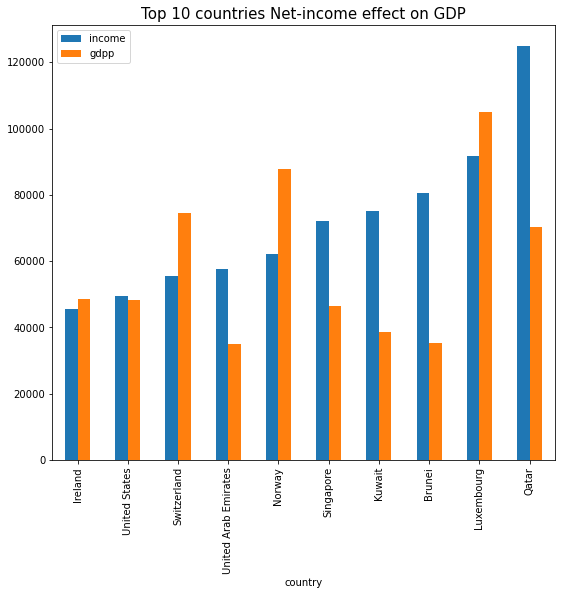

In [23]:
top_income.plot(x='country',y=['income','gdpp'],kind="bar",figsize=(9,8))
plt.title('Top 10 countries Net-income effect on GDP',fontsize=15);

### Observation : The bottom 10 countries tends to spend more and theri GDP is much less. Where as in case of Top countrie in Income have almost same GDP as income for some countries

### 5) Inflation
#### The measurement of the annual growth rate of the Total GDP

### Top 10 countries havie least Inflation

In [24]:
top_inf = df.sort_values(by=['income']).tail(10)
bottom_inf = df.sort_values(by=['income']).head(10)

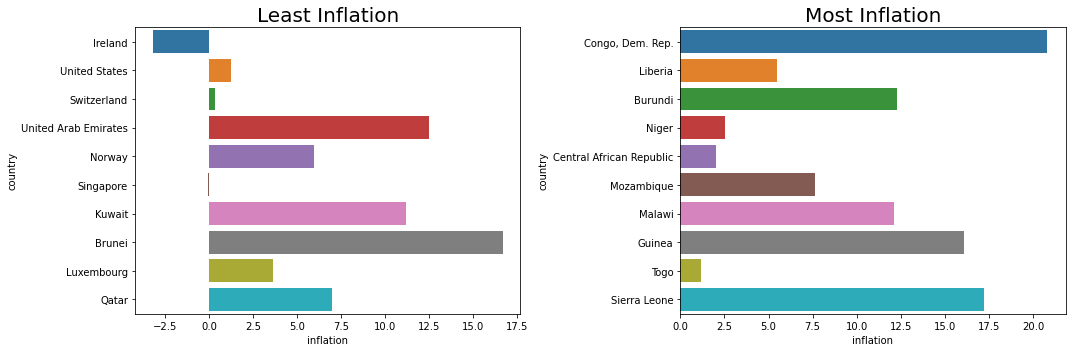

In [25]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x='inflation',y='country',data=top_inf,ax=axes[0])
sns.barplot(x='inflation',y='country',data=bottom_inf,ax=axes[1])
axes[0].set_title("Least Inflation", fontsize = 20,loc='center')
axes[1].set_title("Most Inflation", fontsize = 20,loc='center')
plt.tight_layout();

### 6) Life Expectancy and total Fertility
#### The average number of years a new born child would live if the current mortality patterns are to remain the same
#### The number of children that would be born to each woman if the current age-fertility rates remain the same.

In [26]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [27]:
top_life = df.sort_values(by=['life_expec']).tail(10)
bottom_life = df.sort_values(by=['life_expec']).head(10)

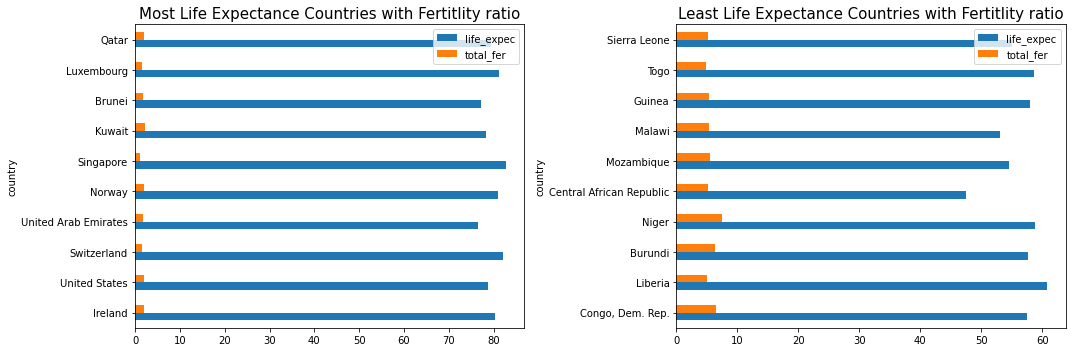

In [28]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
top_income.plot(x='country',y=['life_expec','total_fer'],kind="barh",ax=axes[0])
bottom_income.plot(x='country',y=['life_expec','total_fer'],kind="barh",ax=axes[1])
axes[0].set_title("Most Life Expectance Countries with Fertitlity ratio", fontsize = 15,loc='center')
axes[1].set_title("Least Life Expectance Countries with Fertitlity ratio", fontsize = 15,loc='center')
plt.tight_layout();

In [29]:
top_fer = df.sort_values(by=['total_fer']).tail(10)
bottom_fer = df.sort_values(by=['total_fer']).head(10)

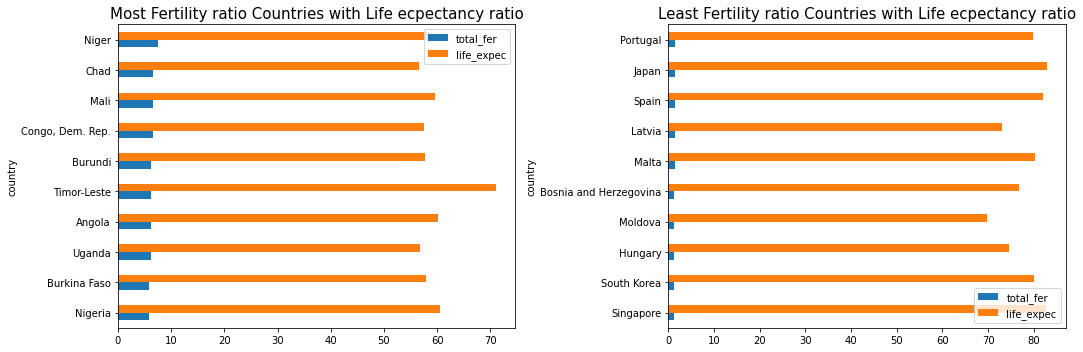

In [30]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
top_fer.plot(x='country',y=['total_fer','life_expec'],kind="barh",ax=axes[0])
bottom_fer.plot(x='country',y=['total_fer','life_expec'],kind="barh",ax=axes[1])
axes[0].set_title("Most Fertility ratio Countries with Life ecpectancy ratio", fontsize = 15,loc='center')
axes[1].set_title("Least Fertility ratio Countries with Life ecpectancy ratio", fontsize = 15,loc='center')
plt.tight_layout();

### Model Building

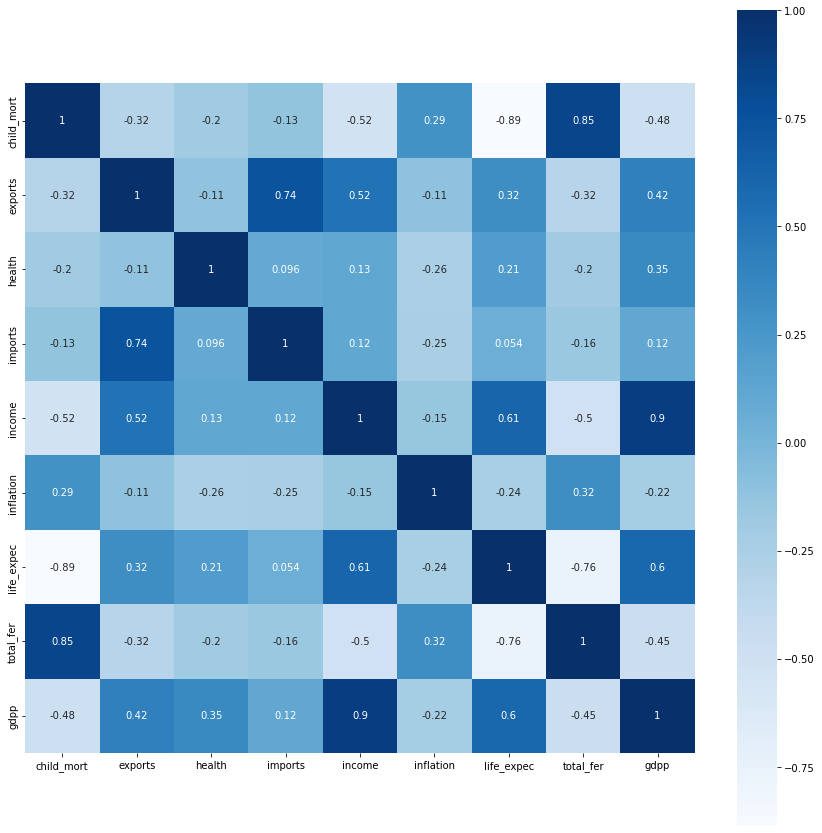

In [33]:
plt.figure(figsize = (15,15))
ax = sns.heatmap(df.corr(),square = True,annot=True, cmap="Blues")
bottom, top = ax.get_ylim();

<Figure size 1800x1080 with 0 Axes>

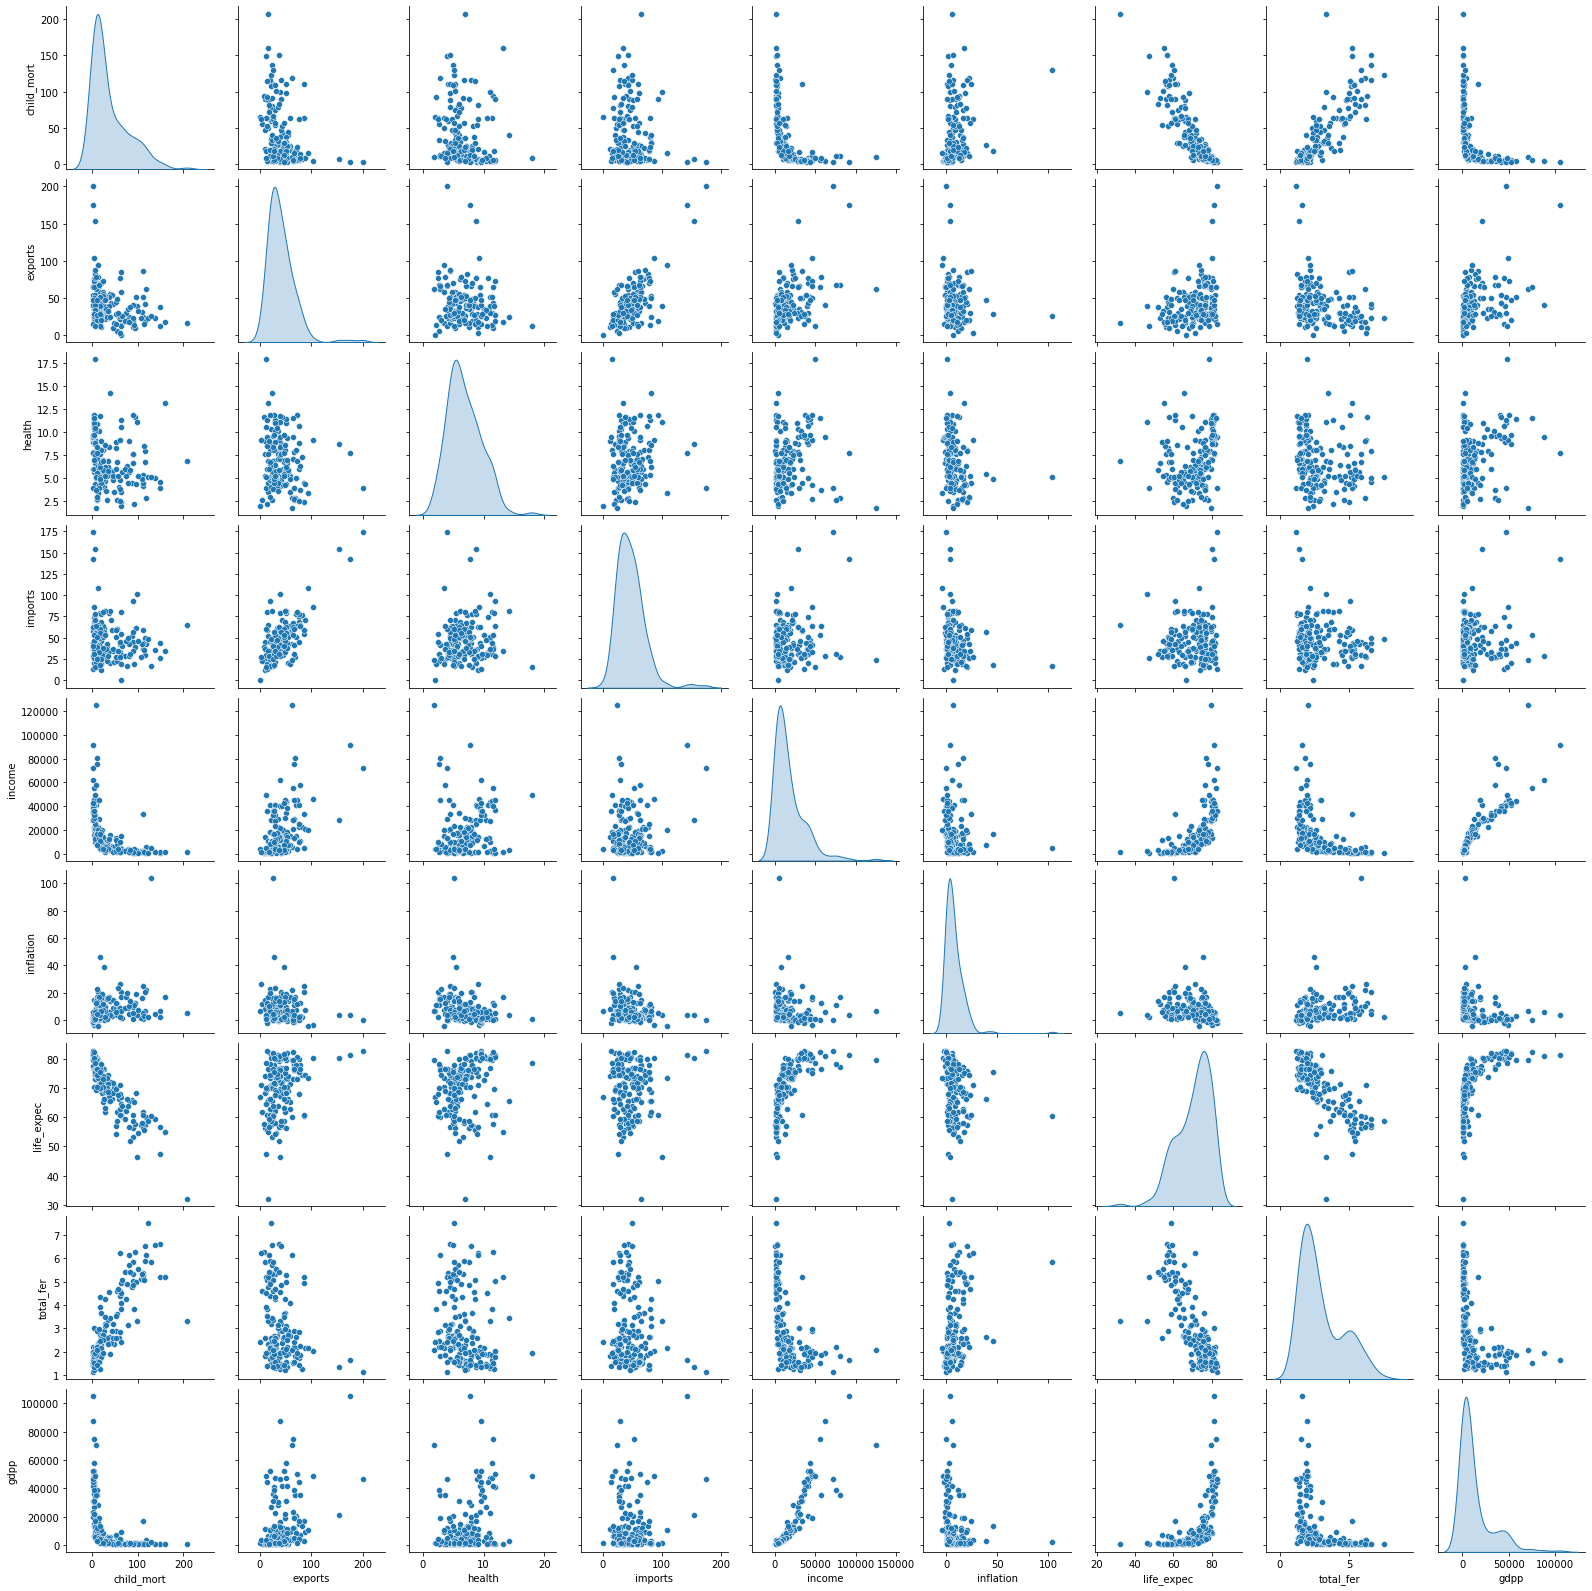

In [35]:
plt.figure(figsize = (25,15))
sns.pairplot(df, diag_kind='kde')
plt.show();

In [43]:
X = df.drop('country',axis=1)
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X);
print(X)

[[ 1.29153238 -1.19927911  0.30123858 ... -1.61909203  1.92639646
  -0.70225949]
 [-0.5389489  -0.49806893 -0.08896601 ...  0.64786643 -0.86505432
  -0.49872564]
 [-0.27283273 -0.09292528 -0.99060381 ...  0.67042323 -0.03498262
  -0.47743428]
 ...
 [-0.37231541  1.21600038  0.02089742 ...  0.28695762 -0.66423052
  -0.65869853]
 [ 0.44841668 -0.42015669 -0.60797601 ... -0.34463279  1.15657191
  -0.65869853]
 [ 1.11495062 -0.14746385 -0.33900002 ... -2.09278484  1.64524315
  -0.6500669 ]]


### Finding required number of clusters using elbow mwthod

In [49]:
from sklearn.cluster import KMeans

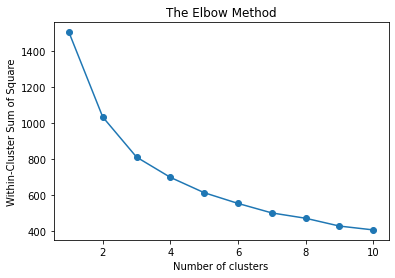

In [52]:
ls = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    ls.append(kmeans.inertia_)
plt.plot(range(1, 11), ls,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()


### From above plot we can try number of cluster k=3,4,5 

### Silhouette Validation

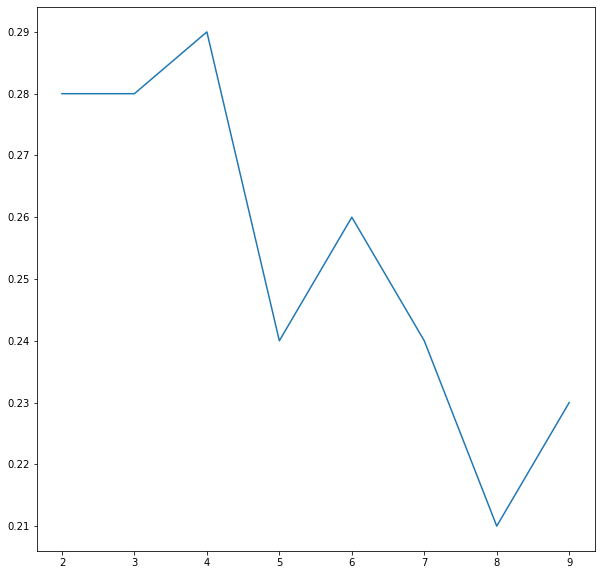

In [53]:
from sklearn.metrics import silhouette_score
score=[]
plt.figure(figsize=(10,10))
for i in range(2,10):
    k=KMeans(i)
    k.fit(x)
    score.append(np.round(silhouette_score(x,k.labels_),2))
plt.plot(range(2,10),score)
plt.show()

In [67]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [68]:
y_kmeans

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [75]:
df['cluster'] = y_kmeans
df.sample(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
84,Lao,78.9,35.4,4.47,49.3,3980.0,9.200,63.8,3.15,1140.0,0
61,Grenada,14.6,23.8,5.86,49.2,11200.0,0.480,71.3,2.24,7370.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,0
12,Bangladesh,49.4,16.0,3.52,21.8,2440.0,7.140,70.4,2.33,758.0,1
122,Portugal,3.9,29.9,11.00,37.4,27200.0,0.643,79.8,1.39,22500.0,2
130,Serbia,7.6,32.9,10.40,47.9,12700.0,5.880,74.7,1.40,5410.0,1
148,Thailand,14.9,66.5,3.88,60.8,13500.0,4.080,76.6,1.55,5080.0,1
123,Qatar,9.0,62.3,1.81,23.8,84374.0,6.980,79.5,2.07,70300.0,2
156,Ukraine,11.7,47.1,7.72,51.1,7820.0,13.400,70.4,1.44,2970.0,1
143,Suriname,24.1,52.5,7.01,38.4,14200.0,7.200,70.3,2.52,8300.0,1


### Centroid of clusters

In [70]:
kmeans.cluster_centers_

array([[ 1.38209405, -0.46545589, -0.16588688, -0.19661153, -0.73275144,
         0.43075716, -1.27706228,  1.39999363, -0.62899821],
       [-0.39499509, -0.01710507, -0.22262417,  0.03840599, -0.26063774,
         0.0358    ,  0.23231109, -0.41678691, -0.37565502],
       [-0.82153348,  0.61750802,  0.71165477,  0.15724398,  1.50270639,
        -0.61681162,  1.06029009, -0.79431368,  1.63483621]])

### Countries in cluster one

In [71]:
print("Cluster One")
df.loc[df['cluster']==0]['country'].to_list()

Cluster One


['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

### Countries in cluster two

In [72]:
print("Cluster Two")
df.loc[df['cluster']==1]['country'].to_list()

Cluster Two


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'T

### Countries in cluster three

In [73]:
print("Cluster Three")
df.loc[df['cluster']==2]['country'].to_list()

Cluster Three


['Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']